## Melbourne Housing Price Prediction
### Task Overview

This project uses the Melbourne Housing Market dataset to predict house prices based on different property features such as location, number of rooms, land size, year built, and other factors.

The goal is to build and evaluate regression models (Linear Regression / Multiple Regression / other ML models) to understand the factors influencing property prices in Melbourne.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

-> As from visual observation few columns like date,Address,Postcode,YearBuilt,Lattitude and Longtitude.

-> This removed col don't play any role in prediction

In [5]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']

df = df[cols_to_use]
df.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [6]:
df.shape

(34857, 15)

## Data Cleaning

In [7]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

-> dropping Regionname (3), Propertycount (3), Distance (1), CouncilArea (3)

-> also droping the records with null price as it can't be used for training

In [8]:
df = df.dropna(subset=['Regionname', 'Propertycount', 'Distance', 'CouncilArea', 'Price'])
df.shape

(27244, 15)

-> Fill missing values in important numeric columns with median 

In [9]:
df['Bedroom2'] = df['Bedroom2'].fillna(df['Bedroom2'].median())
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())
df['Car'] = df['Car'].fillna(df['Car'].median())

-> Drop columns with too many missing values (Landsize & BuildingArea) 

-> as they 50-60% null values

In [10]:
df = df.drop(['Landsize', 'BuildingArea'], axis=1)

In [11]:
df.shape

(27244, 13)

In [12]:
df.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Price            0
dtype: int64

## EDA

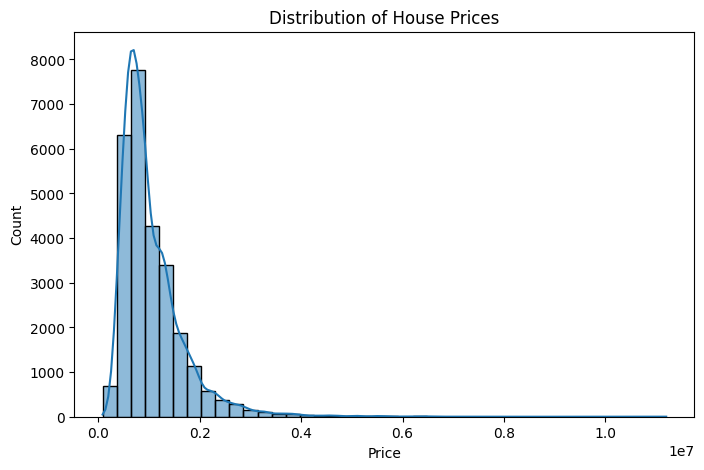

In [ ]:
# 1. Distribution of prices
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=40, kde=True)
plt.title("Distribution of House Prices")
plt.show()


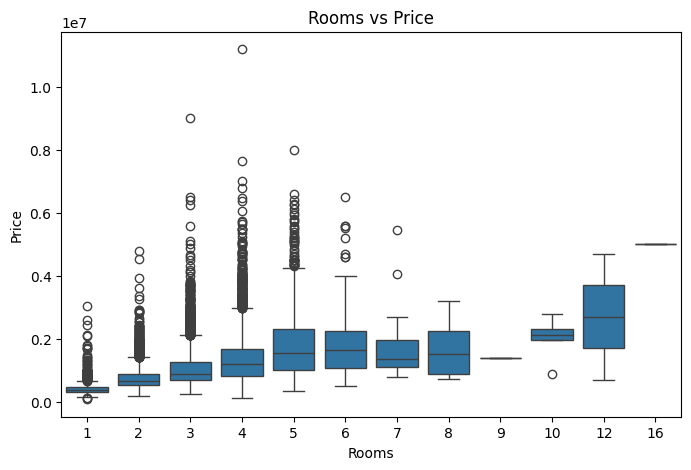

In [14]:
# 2. Rooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='Rooms', y='Price', data=df)
plt.title("Rooms vs Price")
plt.show()

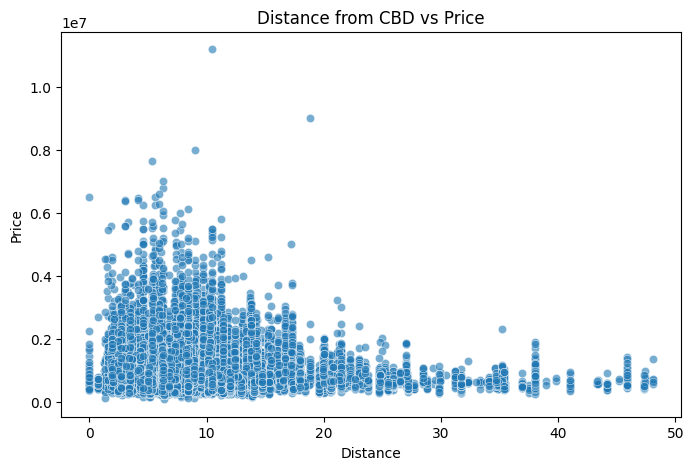

In [15]:
# 3. Distance vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Distance', y='Price', data=df, alpha=0.6)
plt.title("Distance from CBD vs Price")
plt.show()


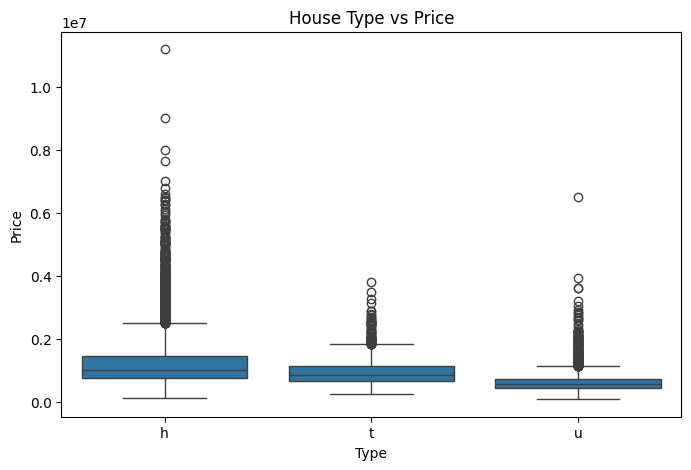

In [16]:
# 4. Type vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Price', data=df)
plt.title("House Type vs Price")
plt.show()


In [17]:
# 5. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Abbotsford'

<Figure size 1000x600 with 0 Axes>

-> one hot encoding for categorical features

In [19]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Price,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,1480000.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,1035000.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,1465000.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,850000.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,1600000.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


-> now the dataset i clean and all the features have numeric value only

## test_train split

In [21]:
x = df.drop('Price', axis=1)
y = df['Price']

In [22]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=2)

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression()

In [27]:
print("--- Linear Regression ---")
print("Training set score: {:.2f}".format(reg.score(train_X, train_y)))
print("Test set score: {:.2f}".format(reg.score(test_X, test_y)))

--- Linear Regression ---
Training set score: 0.68
Test set score: 0.67


## LASSO Regression

In [28]:
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [29]:
print("--- LASSO Regression ---")
print("Training set score: {:.2f}".format(reg.score(train_X, train_y)))
print("Test set score: {:.2f}".format(reg.score(test_X, test_y)))

--- LASSO Regression ---
Training set score: 0.68
Test set score: 0.67


## Ridge Regression

In [ ]:
ridge_reg= linear_model.Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=75, max_iter=100, tol=0.1)

In [37]:
print("--- Ridge Regression ---")
print("Training set score: {:.2f}".format(reg.score(train_X, train_y)))
print("Test set score: {:.2f}".format(reg.score(test_X, test_y)))

--- Ridge Regression ---
Training set score: 0.68
Test set score: 0.67
